# Лабораторная работа №4

Маратова Диана AIN-2-21

In [184]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

<br><h3>        load_digits(*[, n_class, return_X_y, as_frame]) - Оптическое распознавание набора данных рукописных цифр 

<br>Изучите данные

In [185]:
digit_dataset = load_digits()
print(digit_dataset.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [186]:
print(digit_dataset['data'])
digit_dataset['data'].shape

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


(1797, 64)

In [187]:
print(digit_dataset['target'])
digit_dataset['target'].shape

[0 1 2 ... 8 9 8]


(1797,)

In [188]:
print(digit_dataset['images'].shape)
digit_dataset['images']

(1797, 8, 8)


array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [189]:
print(digit_dataset['DESCR'][:1000])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<br>Разделите данные на обучающий и тестовые наборы

In [190]:
X_train, X_test, y_train, y_test = train_test_split(digit_dataset['data'], digit_dataset['target'], random_state=0)

In [191]:
print("x_train: {}".format(X_train.shape))
print("y_train: {} \n".format(y_train.shape))
print("x_test: {}".format(X_test.shape))
print("y_test: {} \n".format(y_test.shape))
print(y_test)


x_train: (1347, 64)
y_train: (1347,) 

x_test: (450, 64)
y_test: (450,) 

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


<br> Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков

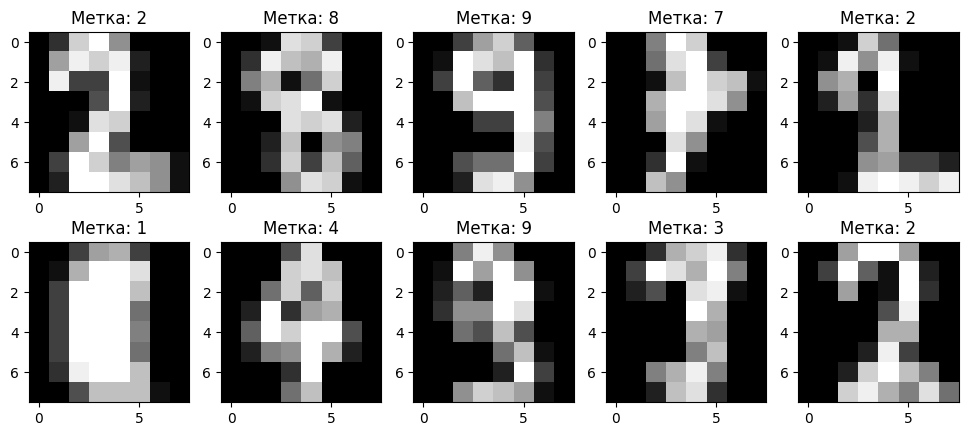

In [192]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Метка: {y_train[i]}")
plt.show()


<br> Постройте модель по методу k-ближайших средних. Протестируйте на произвольном наборе данных

In [193]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<br> Получите прогноз модели

In [194]:
y_pred = knn.predict(X_test)

<br> Оцените качество модели

In [195]:
knn.score(X_test,y_test)

0.9911111111111112

In [196]:
knn2 = KNeighborsClassifier(n_neighbors=3)

knn2.fit(X_train, y_train)

knn2.score(X_test,y_test)

0.9866666666666667

In [153]:
knn3 = KNeighborsClassifier(n_neighbors=5)

knn3.fit(X_train, y_train)

knn3.score(X_test,y_test)

0.98

In [155]:
knn4 = KNeighborsClassifier(n_neighbors=9)

knn4.fit(X_train, y_train)

knn4.score(X_test,y_test)

0.9777777777777777

<br> Сделайте выводы по качеству моделей


        При увеличении n_neighbors точность понижается.
        Наибольшая точность достигается при n_neighbors=1

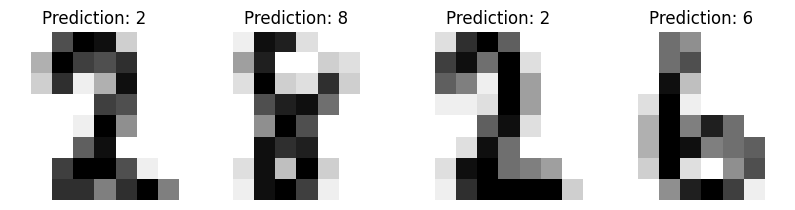

In [60]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

<br><h3> load_wine(*[, return_X_y, as_frame]) - Набор данных по распознаванию вин

<br>Изучите данные

In [61]:
wine_dataset = load_wine()
print(wine_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [62]:
print(wine_dataset['DESCR'][:1000])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [63]:
print(wine_dataset['data'])
print(wine_dataset['target_names'])
print(wine_dataset['target'])

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


<br>Разделите данные на обучающий и тестовые наборы

In [157]:
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)

In [65]:
print("x_train: {}".format(X_train.shape))
print("y_train: {} \n".format(y_train.shape))
print("x_test: {}".format(X_test.shape))
print("y_test: {} \n".format(y_test.shape))
print(y_test)

x_train: (133, 13)
y_train: (133,) 

x_test: (45, 13)
y_test: (45,) 

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


<br> Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков

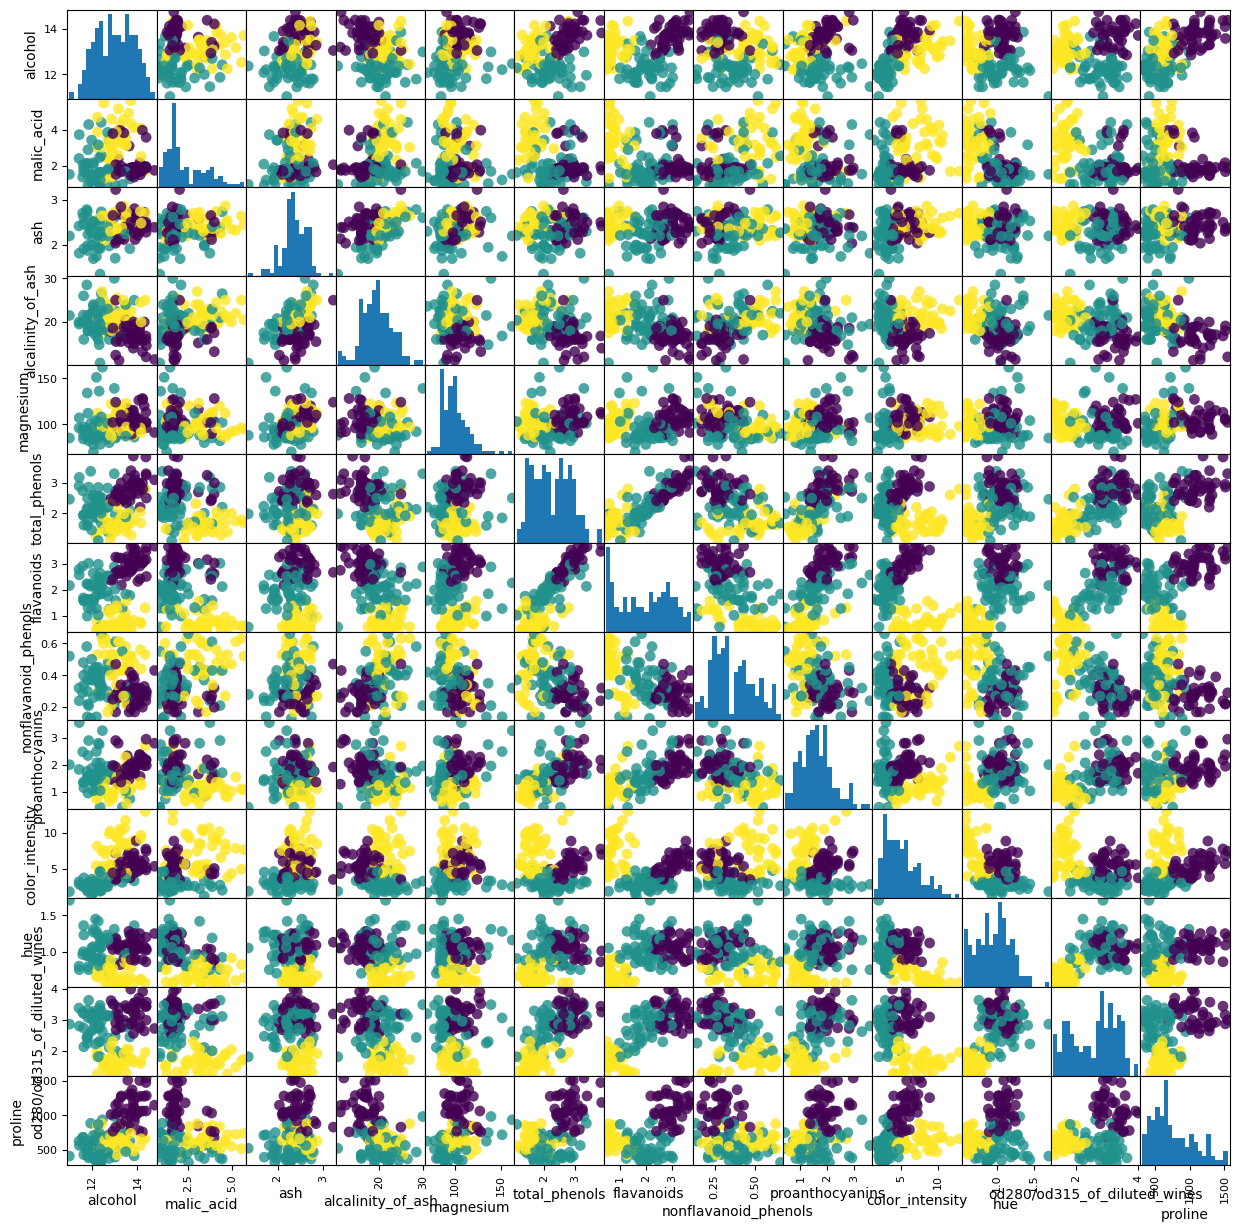

In [26]:
import pandas as pd
wine_dataframe=pd.DataFrame(X_train, columns=wine_dataset.feature_names)
grr = pd.plotting.scatter_matrix(wine_dataframe, c=y_train, figsize= (15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8)

<br> Постройте модель по методу k-ближайших средних. Протестируйте на произвольном наборе данных

In [97]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

<br> Получите прогноз модели

In [76]:
y_pred = knn.predict(X_test)

<br> Оцените качество модели

In [98]:
knn.score(X_test,y_test)

0.7777777777777778

In [167]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)
knn2.score(X_test,y_test)


0.7555555555555555

In [170]:
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)
knn3.score(X_test,y_test)

0.7333333333333333

In [172]:
knn4 = KNeighborsClassifier(n_neighbors=7)
knn4.fit(X_train, y_train)
knn4.score(X_test,y_test)

0.7777777777777778

In [171]:
knn5 = KNeighborsClassifier(n_neighbors=9)
knn5.fit(X_train, y_train)
knn5.score(X_test,y_test)

0.7111111111111111

<br> Сделайте выводы по качеству моделей

        Наибольшая точность достигается при n_neighbors=4 и 7

<br><h3> load_breast_cancer(*[, return_X_y, as_frame]) - Набор данных по раку груди висконсин (диагностический)

<br> Изучите данные

In [36]:
cancer_dataset = load_breast_cancer()
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
print(cancer_dataset['data'] ," \n"
    ,cancer_dataset['target'],"\n"
    ,cancer_dataset['target_names'],"\n"
    ,cancer_dataset['DESCR'][:1000])


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]  
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1

<br> Разделите данные на обучающий и тестовые наборы

In [174]:
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'], cancer_dataset['target'], random_state=0)

In [38]:
print("x_train: {}".format(X_train.shape))
print("y_train: {} \n".format(y_train.shape))
print("x_test: {}".format(X_test.shape))
print("y_test: {} \n".format(y_test.shape))
print(y_test)

x_train: (426, 30)
y_train: (426,) 

x_test: (143, 30)
y_test: (143,) 

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


<br> Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков

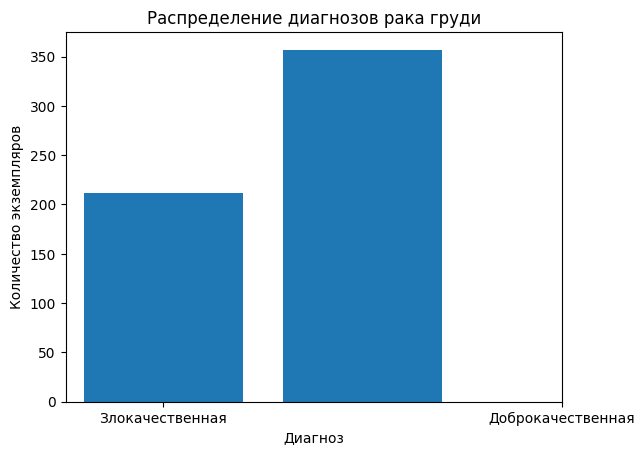

In [43]:
plt.hist(cancer_dataset['target'], bins=2, rwidth=0.8, align='left')
plt.xticks([0, 1], ['Злокачественная', 'Доброкачественная'])
plt.xlabel("Диагноз")
plt.ylabel("Количество экземпляров")
plt.title("Распределение диагнозов рака груди")
plt.show() 

<br> Постройте модель по методу k-ближайших средних. Протестируйте на произвольном наборе данных

In [175]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

<br> Получите прогноз модели

In [176]:
y_pred = knn.predict(X_test)

<br> Оцените качество модели

In [177]:
knn.score(X_test,y_test)

0.958041958041958

In [178]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)
knn2.score(X_test,y_test)

0.916083916083916

In [179]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
knn3.score(X_test,y_test)

0.9230769230769231

In [183]:
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X_train, y_train)
knn4.score(X_test,y_test)

0.9370629370629371

<br> Сделайте выводы по качеству моделей

        При увеличении n_neighbors точность повышается